In [1]:
# Imports
#---------
import sys
import pandas as pd
import numpy as np
import feather
import os
import gc
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import matplotlib as mpl
import qgrid

register_matplotlib_converters()

# File locations
#----------------
folder = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/1oxaria/json/gap_filling/'
pngs = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/pngs/gap_filling/'


In [2]:
# Load the df 
#-------------
oxaria1_status = pd.read_feather(folder+'oxaria1_status_gf.ftr').set_index(['tag','rec']).sort_index()


In [3]:
oxaria1_status.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4137083 entries, ('scs-bgx-536', Timestamp('2020-01-04 09:46:25+0000', tz='UTC')) to ('scs-bgx-543', Timestamp('2021-02-28 23:59:50+0000', tz='UTC'))
Data columns (total 30 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   val.sch.scs-particulates.tally     float32
 1   val.sch.scs-particulates.interval  float32
 2   val.sch.scs-status.tally           float32
 3   val.sch.scs-status.interval        float32
 4   val.sch.scs-climate.tally          float32
 5   val.sch.scs-climate.interval       float32
 6   val.sch.scs-gases.tally            float32
 7   val.sch.scs-gases.interval         float32
 8   val.gps.pos:0                      float32
 9   val.gps.pos:1                      float32
 10  val.gps.elv                        float32
 11  val.gps.qual                       float32
 12  val.up.load.av15                   float32
 13  val.up.load.av1                    float32

In [4]:
df = oxaria1_status.iloc[:,[26,29]]
df

val.tmp.brd            name
tag         rec                                                   
scs-bgx-536 2020-01-04 09:46:25+00:00    27.299999         High St
            2020-01-04 09:47:25+00:00    27.400000         High St
            2020-01-04 09:48:25+00:00    27.400000         High St
            2020-01-04 09:49:25+00:00    27.400000         High St
            2020-01-04 09:50:25+00:00    27.400000         High St
...                                            ...             ...
scs-bgx-543 2021-02-28 23:55:50+00:00    12.100000  John Radcliffe
            2021-02-28 23:56:50+00:00    12.100000  John Radcliffe
            2021-02-28 23:57:50+00:00    12.100000  John Radcliffe
            2021-02-28 23:58:50+00:00    12.100000  John Radcliffe
            2021-02-28 23:59:50+00:00    12.100000  John Radcliffe

[4137083 rows x 2 columns]

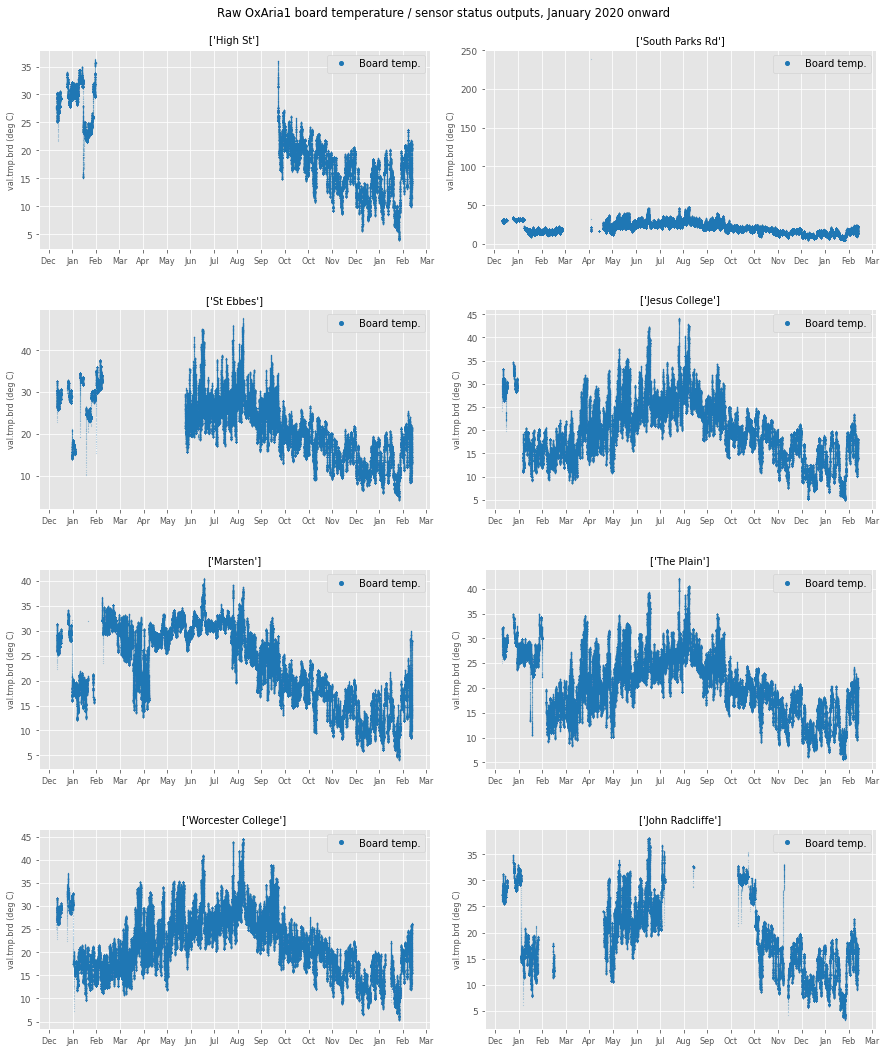

In [5]:
# Loop through plots with a log scale to compare time series & size fractions

df = oxaria1_status.iloc[:,[26,29]]

plt.style.use('ggplot')
#plt.tight_layout()
myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,1,1)
end_date=dt.datetime(2020,12,31)

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, sharey=False, figsize=(15,20))
axes_list = [item for sublist in axes for item in sublist] 

fig.suptitle('Raw OxAria1 board temperature / sensor status outputs, January 2020 onward', fontsize=11.5, y=0.91)

for tag, dat in df.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0,inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.tmp.brd', c='tab:blue',linewidth=0.5, marker='o', ms=0.1, ls='', label='Board temp.', ax=ax, legend=True, \
            zorder=1)
    ax.set_title(t_name, fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
        )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(28))
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='center')
    #ax.set_xlim(start_date, end_date)
    ax.set_ylabel('val.tmp.brd (deg C)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.14, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper right') 
    
plt.savefig(pngs+'oxaria1_brdtmp_raw_sensor_ts.png')
plt.show()    
    
for ax in axes_list:
    ax.remove()
